# Impacto de la presencia de covid-19 en el interes en educacion online 

In [1]:
# API para conectarse a google trends
!pip install pytrends

  Using cached pytrends-4.7.3-py3-none-any.whl (14 kB)


You should consider upgrading via the 'c:\users\gerson\documents\anaconda\python.exe -m pip install --upgrade pip' command.


In [1]:
# Obtencion de datos de google trends
from pytrends.request import TrendReq

# Herramientas de analisis
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t
import math
import seaborn as sns

# Configuracion
%matplotlib inline
plt.style.use("seaborn-darkgrid")
plt.rcParams.update({'font.size': 18})
LOCATION_OF_STUDY = "CO"
DATE_FORMAT = "%Y-%m-%d"
MAIN_KEYWORD = "covid-19"

In [2]:
def get_interest_overtime_given_a_keyword_and_location(keyword: str, location: str = LOCATION_OF_STUDY) -> pd.DataFrame:
    try:
        # Instanciacion del objeto de trending request
        trend_request = TrendReq()
        # Busqueda de la keyword
        trend_request.build_payload(kw_list=[keyword],geo=location)
        return trend_request.interest_over_time()
    except Exception as error:
        print(f"Error {error} has happened, please check the argumends")

In [4]:
def get_slice_of_df_given_years(df: pd.DataFrame, start: str, end: str) -> pd.DataFrame:
    return df.loc[(df.index > start) & (df.index < end)]

In [3]:
def get_dataset_given_keywords(keywords_set: list) -> pd.DataFrame:
    full_df = pd.DataFrame()
    for idx, keyword in enumerate(keywords_set):
        df = get_interest_overtime_given_a_keyword_and_location(keyword)
        df = get_slice_of_df_given_years(df, "2020", "2021")
        df = df[keyword]
        full_df[keyword] = df
    return full_df

In [5]:
def plot_df_given_a_column(df: pd.DataFrame, column: str, width: int, height: int, title: str = None, show: bool = True) -> None:
    fig, ax = plt.subplots()
    fig.set_figheight(height)
    fig.set_figwidth(width)
    ax.plot(df.index, df[column])
    ax.set_xlabel("date")
    ax.set_ylabel("keyword: '" + column + "' interest")
    if title:
        ax.set_title(title)
    fig.autofmt_xdate()
    if show:
        plt.show()

In [6]:
covid_19_interest_over_time = get_interest_overtime_given_a_keyword_and_location(MAIN_KEYWORD)

In [7]:
covid_19_searches_in_2019 = get_slice_of_df_given_years(covid_19_interest_over_time, "2019","2020")

In [8]:
# Confirmando que no hubo busquedas anteriores
covid_19_searches_in_2019[MAIN_KEYWORD].value_counts()

0    52
Name: covid-19, dtype: int64

In [9]:
covid_19_searches_in_2020 = get_slice_of_df_given_years(covid_19_interest_over_time, "2020", "2021")

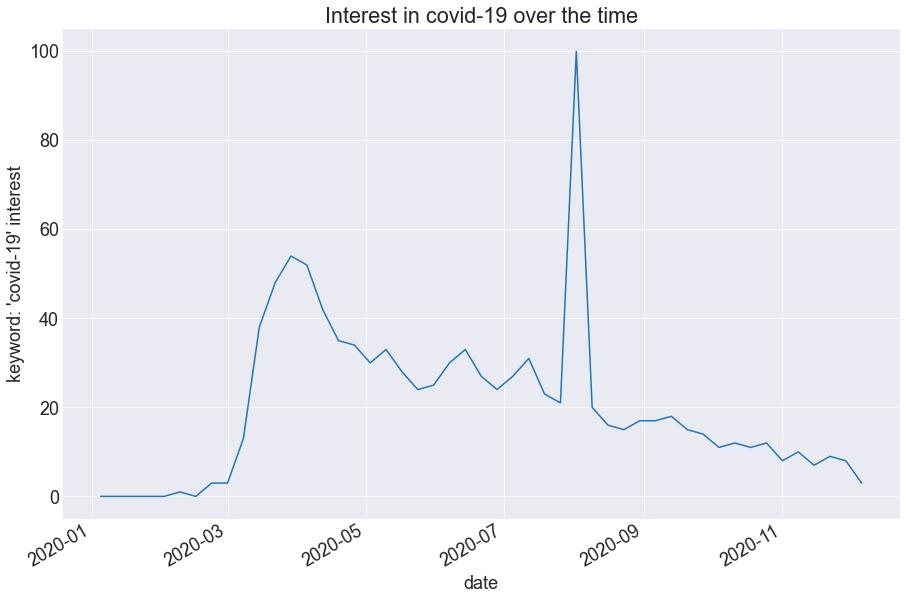

In [10]:
plot_df_given_a_column(covid_19_searches_in_2020, MAIN_KEYWORD, 15, 10, "Interest in "+MAIN_KEYWORD+" over the time")
# El interes en el keyword covid-19 ha bajado a lo largo de tiempo, 
# iniciando desde el 2 de frebrero con sus primeras busquesdas
# Sin embargo, durante el perido del 2 a 9 de agosto hubo un tope en interes por este tema
# Esto podria deberse al pronunciamiento de Ivan Duque respecto a la pandemia y la vida productiva del pais
# https://twitter.com/IvanDuque/status/1292289651420561408

# Es necesario resaltar que el interes no mide el volumen de trafico por el cual se busca informacion usando un keyword
# en realidad se trata de una medida relativa respecto al punto de mayor interes

# Utilizaremos este interes relativo para analizar el interes del covid-19 respecto a otras busquedas e intereses

In [13]:
# El primer pico se dio en en la semana del 2020-03-29
covid_19_searches_in_2020[MAIN_KEYWORD].sort_values(ascending=False)[0:3]

date
2020-08-02    100
2020-03-29     54
2020-04-05     52
Name: covid-19, dtype: int32

In [12]:
# Haremos el mismo ejercicio con el keyword "cursos online"
# para ver su comportamiento en años anteriores y en este
online_courses_interest_over_time = get_interest_overtime_given_a_keyword_and_location("cursos online")

In [14]:
online_courses_interest_2019 = get_slice_of_df_given_years(online_courses_interest_over_time, "2019", "2020")

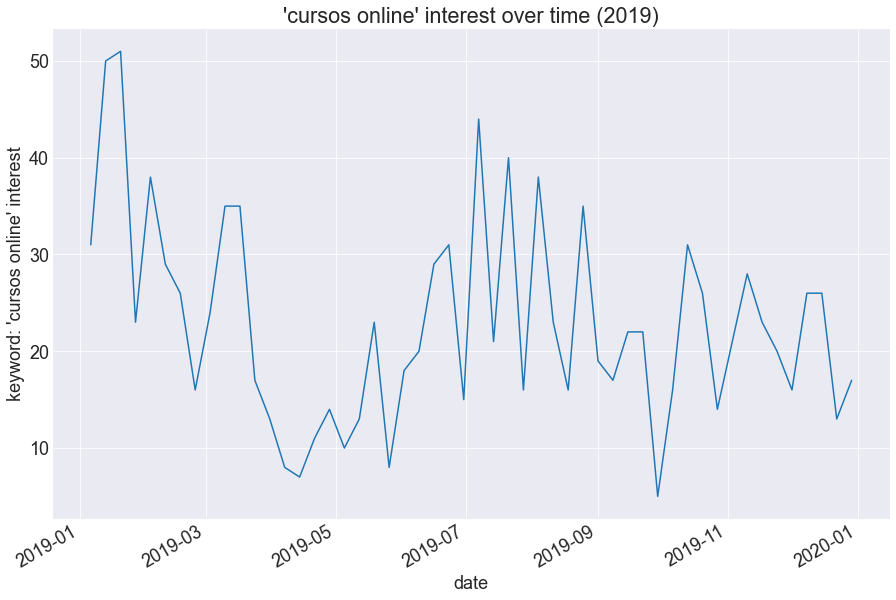

In [15]:
plot_df_given_a_column(online_courses_interest_2019, "cursos online", 15, 10, "'cursos online' interest over time (2019)")
# El año 2019 no tuvo un interes muy grande en "cursos online"

In [16]:
# interes en "cursos online" en el 2020
online_courses_interest_2020 = get_slice_of_df_given_years(online_courses_interest_over_time, "2020", "2021")

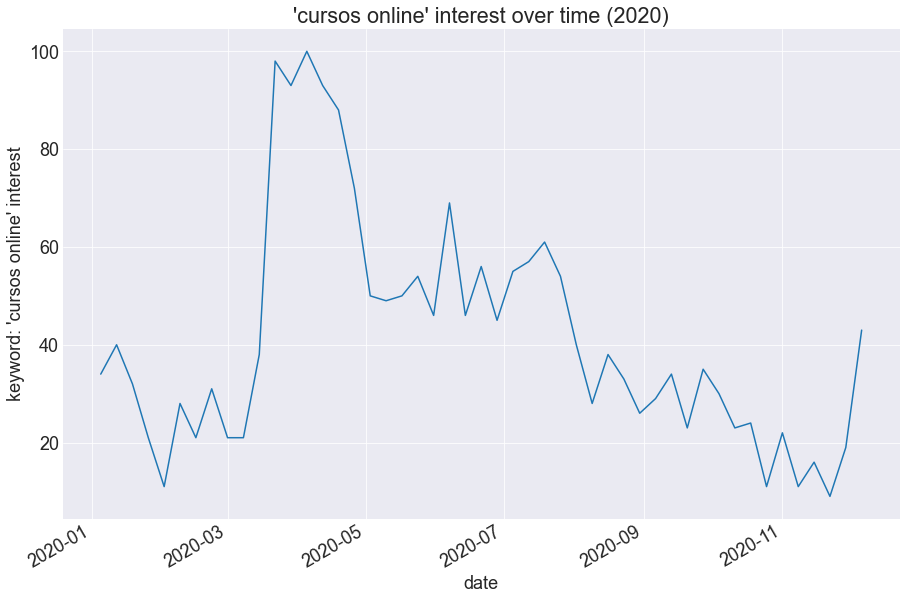

In [17]:
plot_df_given_a_column(online_courses_interest_2020, "cursos online", 15, 10, "'cursos online' interest over time (2020)")
# Podemos notar que hubo un pico en interes en cursos online
# Probablemente se dio como resultado de la declaracion oficial de la cuarentena obligatoria en Colombia (24 de marzo)
# El comportamiento de busquedas de este keyword ha estado bajando
# Sabiendo esto, ¿Tendra que ver el Covid-19 con el aumento en el interes por cursos online?

In [18]:
# Este pico concuerda con el segundo pico mas grande en las en la grafica de covid-19
online_courses_interest_2020[online_courses_interest_2020["cursos online"] == 100]

,cursos online,isPartial
date,,
2020-03-29,100,False


In [19]:
# Uniendo las keywords de ambas busquedas
covid_19_and_online_cursos_2020_interest = pd.concat(
                    [online_courses_interest_2020["cursos online"], 
                     covid_19_searches_in_2020[MAIN_KEYWORD]], axis=1)

In [20]:
# eliminamos el outlier del 2020-08-02
covid_19_online_courses_subset = covid_19_and_online_cursos_2020_interest.loc[
                                    (covid_19_and_online_cursos_2020_interest.index != "2020-08-02") &
                                    (covid_19_and_online_cursos_2020_interest[MAIN_KEYWORD] != 0)]

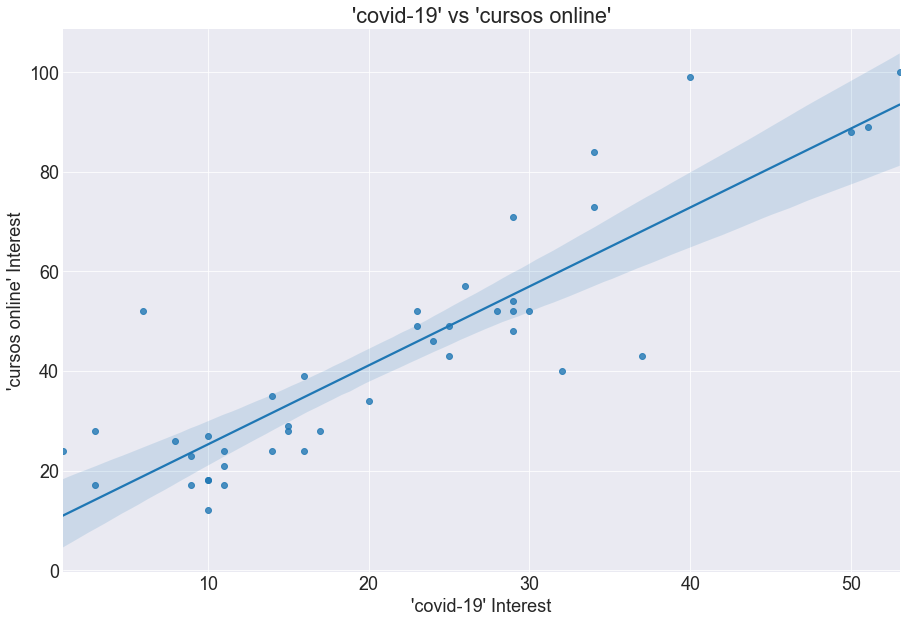

In [21]:
plt.figure(figsize=(15,10))
sns.regplot(x = covid_19_online_courses_subset[MAIN_KEYWORD], y = covid_19_online_courses_subset["cursos online"])
plt.xlabel("'" +MAIN_KEYWORD+"' Interest")
plt.ylabel("'cursos online' Interest")
plt.title("'"+MAIN_KEYWORD+"' vs 'cursos online'")
plt.show()

In [22]:
# Utilizamos el metodo corr para obtener como se correlacionan estas variables
# es necesario recordar que podriamos tratar este fenomeno como lineal
# dado que vimos el comportamiento en la grafica anterior
# por lo que al no especificarse metodo, se usa el metodo de Pearson
corr_table = covid_19_online_courses_subset.corr()
corr_table

,cursos online,covid-19
cursos online,1.000000,0.882291
covid-19,0.882291,1.000000


In [23]:
samples = covid_19_online_courses_subset.shape[0]

In [24]:
# lo siguiente seria preguntarse, ¿el coeficiente de correlacion es representativo?
correlation_coefficient = corr_table.iloc[0,1]
# Para p < 0.05
alpha = 0.05
samples = covid_19_online_courses_subset.shape[0]
degrees_of_freedom = samples - covid_19_online_courses_subset.shape[1]
standard_error = math.sqrt((1 - correlation_coefficient**2) / (degrees_of_freedom) )
standard_error

0.07442492085365929

In [25]:
# obtenemos el valor de tabla de la distribucion de t student
table_t_student_value = t.ppf(1-alpha, degrees_of_freedom)
is_correlation_significant = correlation_coefficient > standard_error*table_t_student_value
is_correlation_significant
# Podemos decir que la correlacion tiene significancia

True

In [26]:
# Ya que conocemos el procedimiento podemos obtener datos sobre el impacto del covid-19
# en otras keywords
keywords_set = ["cursos gratis","cursos virtuales", 
                "cursos", "cursos por internet", 
                "como hacer", "programacion", "que hacer",
                "platzi", MAIN_KEYWORD]
data = get_dataset_given_keywords(keywords_set)
subset = data.loc[(data.index != "2020-08-02") & (data[MAIN_KEYWORD] != 0) ]

In [27]:
# Obtenemos la correlacion del crecimiento en el interes en las keywords
subset.corr("pearson")[MAIN_KEYWORD]
# Podemos notar en en keywords como
# cursos gratis, cursos virtuales, como hacer y que hacer
# son temas de interes en la poblacion.
# En este caso utilizamos la correlcion de Pearson, 
# ¿Que pasaria si probamos la de spearman para un caso no lineal?

cursos gratis          0.875444
cursos virtuales       0.881449
cursos                 0.558365
cursos por internet    0.317399
como hacer             0.847955
programacion           0.321457
que hacer              0.485686
platzi                 0.183619
covid-19               1.000000
Name: covid-19, dtype: float64

In [28]:
subset.corr("spearman")[MAIN_KEYWORD]
# Es notable que la relacion entre las variables se hace un poco mas fuerte
# evidentemente porque se considera la no linealidad del sistema.

cursos gratis          0.885621
cursos virtuales       0.879248
cursos                 0.529541
cursos por internet    0.271718
como hacer             0.894062
programacion           0.099895
que hacer              0.532518
platzi                 0.358020
covid-19               1.000000
Name: covid-19, dtype: float64

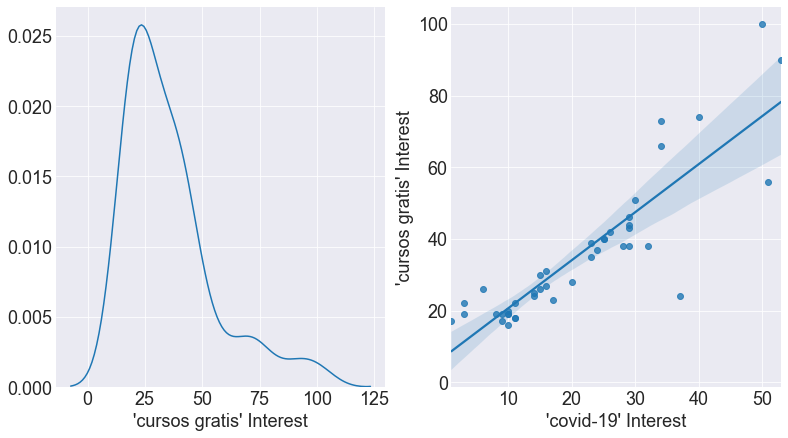


                      Correlation: 0.88
                      Standard error: 0.08 
                      T-student Value: 1.68 
                      Is correlation significant: True
                      Confidence intervals:
                      - superior: 0.91
                      - inferior: 0.83




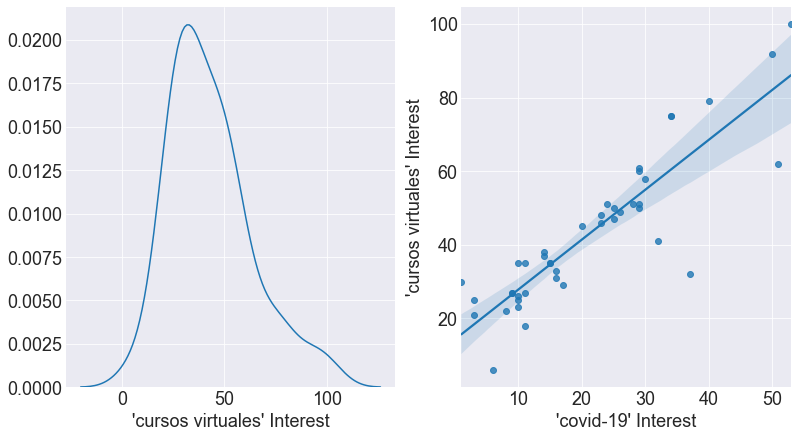


                      Correlation: 0.88
                      Standard error: 0.07 
                      T-student Value: 1.68 
                      Is correlation significant: True
                      Confidence intervals:
                      - superior: 0.91
                      - inferior: 0.84




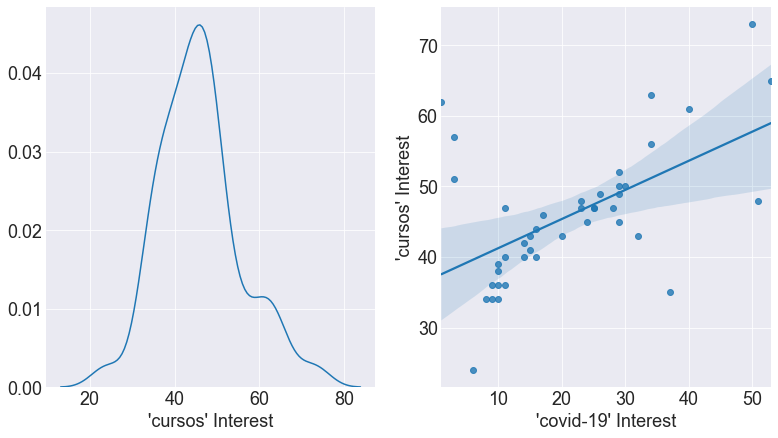


                      Correlation: 0.56
                      Standard error: 0.13 
                      T-student Value: 1.68 
                      Is correlation significant: True
                      Confidence intervals:
                      - superior: 0.66
                      - inferior: 0.44




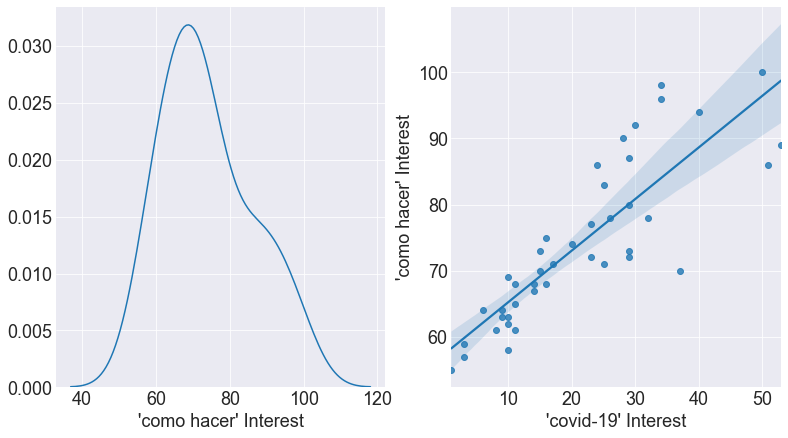


                      Correlation: 0.85
                      Standard error: 0.08 
                      T-student Value: 1.68 
                      Is correlation significant: True
                      Confidence intervals:
                      - superior: 0.89
                      - inferior: 0.8




In [32]:
# Con el fin de conocer cuales de los keywords pueden ser representables por el interes en covid-19
# se utiliza la correlacion de pearson, seleccionando solo las que tiene correlaciones mayores a 0.5
# con esto se procede a generar graficas en la que se muestra la distribucion de las muestras 
# junto con la una grafico que permita ver la tendencia lineal en relacion al interes en covid-19
# para afirmar la significancia se utiliza el mismo ensayo previamente hecho con la distribucion t-student
# Al final se calcula los intervalos de confianza de la correlacion asegurando un p < 0.05
correlations = subset.corr("pearson")[MAIN_KEYWORD]
samples = subset.shape[0]
degrees_of_freedom = samples - 2
table_t_student_value = t.ppf(1-alpha, degrees_of_freedom)
for column in subset.columns: 
    if column == MAIN_KEYWORD:
        pass
    else:
        correlation_coefficient = correlations[column]
        if correlation_coefficient > 0.5 or correlation_coefficient < -0.5:
            fig, (ax1, ax2) = plt.subplots(1,2,figsize = (13, 7)) 
            sns.kdeplot(subset[column], ax = ax1)
            ax1.set_xlabel("'"+column+"' Interest")
            ax1.get_legend().remove()
            sns.regplot(x = MAIN_KEYWORD, y = column, data = subset, ax = ax2)
            ax2.set_xlabel("'"+MAIN_KEYWORD+"' Interest")
            ax2.set_ylabel("'"+column+"' Interest")
            plt.show()
            standard_error = math.sqrt((1 - correlation_coefficient**2) / (degrees_of_freedom))
            is_correlation_significant = correlation_coefficient > standard_error*table_t_student_value
            # intervalo de confianza
            # Transformacion de fisher
            z = math.log((1+correlation_coefficient)/(1- correlation_coefficient))/2
            standard_error_ = 1 / math.sqrt(samples - 3)
            superior_z = z + standard_error_
            inferior_z = z - standard_error_
            transformed_superior_z = math.tanh(superior_z)
            transformed_inferior_z = math.tanh(inferior_z)
            print(f'''
                      Correlation: {round(correlation_coefficient,2)}
                      Standard error: {round(standard_error,2)} 
                      T-student Value: {round(table_t_student_value,2)} 
                      Is correlation significant: {is_correlation_significant}
                      Confidence intervals:
                      - superior: {round(transformed_superior_z,2)}
                      - inferior: {round(transformed_inferior_z,2)}''')
            print("\n")

# Conclusiones

Podemos afirmar que la presencia del covid-19 genero un impacto
en el interes de las personas de Colombia por la educacion online, ademas un detalle muy interesante es que tambien ha sido una fase en la que las busquedas de temas relacionados a "como hacer" tambien han ganado interes, esto podria deberse a que dado la cantidad de tiempo que las personas ahora pasan en sus casas, ahora esten interesadas en aprender cosas.

Este estudio es descriptivo y puede ser extendido en la medida que se agreguen mas keywords de busqueda tanto relacionadas al covid-19 como a educacion online.


